# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline
plt.figure(figsize=(8, 7))

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

In [3]:
iris = datasets.load_iris()
variable_names = iris.feature_names
iris_data = iris.data
iris_data[0:10, ]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
target_var = pd.DataFrame(iris.target)
target_var.head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
scaled_iris = scale(iris_data)
scaled_iris[0:10, ]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [6]:
KMClustering = KMeans(n_clusters=3, random_state=5)
KMClustering.fit(scaled_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [8]:
iris_df = pd.DataFrame(iris_data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
target_var.columns = ['Species']

Text(0.5,1,'K-Means Classification')

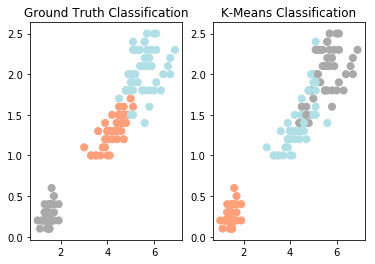

In [9]:
colors = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=colors[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=colors[KMClustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5,1,'K-Means Classification')

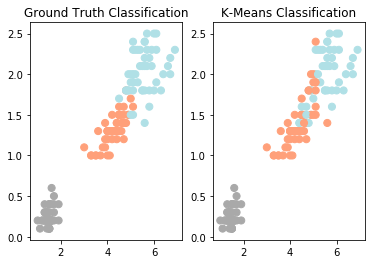

In [10]:
relabeled_clusters = np.choose(KMClustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=colors[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=colors[relabeled_clusters], s=50)
plt.title('K-Means Classification')

In [11]:
modelReport = classification_report(target_var, relabeled_clusters)
print(modelReport)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

